<a href="https://colab.research.google.com/github/rsriya/trisep2024-sm-inputs/blob/main/fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# prompt: In .dat file there are 2 values seperated by comma. The first row is name. But after that all the values are integers. I want to bin the first column.

import numpy as np

# Read the data from the .dat file
data = np.loadtxt('/content/trisep2024-sm-inputs/muon_data_cleaned.dat', delimiter=',', dtype=str, skiprows=1)

# Extract the first column
lifetimes = data[:, 0].astype(int)
print(lifetimes)

[1000 3240 3380 ... 2220  220 1560]


(array([3.065e+03, 2.024e+03, 1.389e+03, 1.037e+03, 6.760e+02, 4.490e+02,
        3.350e+02, 2.080e+02, 1.360e+02, 1.110e+02, 9.200e+01, 4.800e+01,
        4.900e+01, 2.000e+01, 1.600e+01, 2.000e+01, 1.700e+01, 7.000e+00,
        9.000e+00, 7.000e+00, 9.000e+00, 3.000e+00, 8.000e+00, 6.000e+00,
        1.000e+01]),
 array([   40. ,   837.6,  1635.2,  2432.8,  3230.4,  4028. ,  4825.6,
         5623.2,  6420.8,  7218.4,  8016. ,  8813.6,  9611.2, 10408.8,
        11206.4, 12004. , 12801.6, 13599.2, 14396.8, 15194.4, 15992. ,
        16789.6, 17587.2, 18384.8, 19182.4, 19980. ]),
 <BarContainer object of 25 artists>)

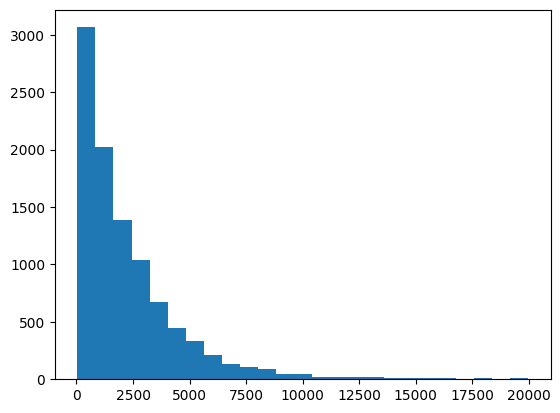

In [43]:
import matplotlib.pyplot as plt
plt.hist(lifetimes, bins = 25)

In [40]:
bin_edges = np.linspace(np.min(lifetimes), np.max(lifetimes), 25)
bin_indices = np.digitize(lifetimes, bins=bin_edges)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitted parameters: [1.00000000e+00 1.00000000e+00 9.99775425e+03]


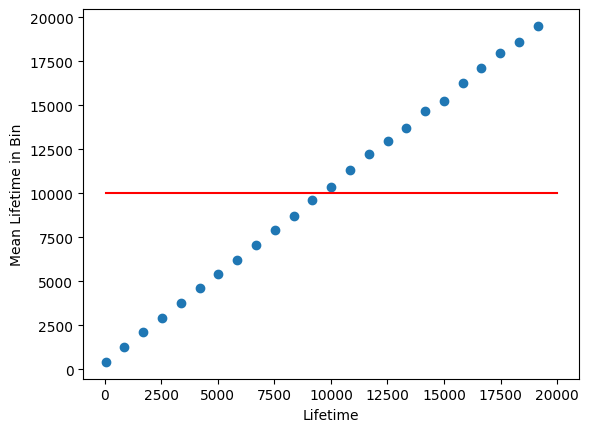

In [42]:
# prompt: I am interesested in only the first column which is lifetime. I want to first bin this data and fit an exponential curve through these bins.

# Fit an exponential curve to the binned data
from scipy.optimize import curve_fit

def exponential_decay(x, a, b):
  return a * np.exp(-b * x) + c
bin_middles = (bin_edges[1:] + bin_edges[:-1]) / 2

popt, pcov = curve_fit(exponential_decay, bin_middles, bin_lifetimes)

# Print the fitted curve parameters
print("Fitted parameters:", popt)

# Plot the data and the fitted curve
import matplotlib.pyplot as plt

plt.scatter(bin_edges[:-1], bin_lifetimes)
plt.plot(bin_edges, exponential_decay(bin_edges, *popt), color='red')
plt.xlabel("Lifetime")
plt.ylabel("Mean Lifetime in Bin")
plt.show()
